In [1]:
pip install "qiskit[visualization]"


Note: you may need to restart the kernel to use updated packages.


In [2]:
#import theano
#theano.config.optimizer = 'None'

In [3]:
import numpy as np
import pandas as pd

# Import Qiskit
import qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import Statevector
import qiskit.quantum_info as qi

import arviz as az

In [4]:
#pip install 'arviz==0.13.0'
! pip install 'pymc'
import pymc as pm

In [5]:
pip install "qiskit-aer"

Note: you may need to restart the kernel to use updated packages.


In [6]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [7]:
def generate_probabilities():
    while True:
        p_x, p_y, p_z = np.random.rand(3)  # Generate random probabilities between 0 and 1
        constraint = (p_x - 0.5)**2 + (p_y - 0.5)**2 + (p_z - 0.5)**2
        if constraint < 0.25:
            return p_x, p_y, p_z  # Return the probabilities if the constraint is satisfied

p_x, p_y, p_z = generate_probabilities()

theta_x = 2 * np.arccos(np.sqrt(p_x))
theta_y = 2 * np.arccos(np.sqrt(p_y))
theta_z = 2 * np.arccos(np.sqrt(p_z))



In [8]:
p_x

0.1335155501479256

In [9]:
p_y

0.4100431775550867

In [10]:
p_z

0.49195671409790076

In [11]:
qc = QuantumCircuit(1)

qc.rx(theta_x, 0)
qc.ry(theta_y, 0)
qc.rz(theta_z, 0)

In [12]:
# qc.measure_all()

In [13]:
sv = qi.Statevector.from_instruction(qc)
sv.draw(output = 'latex')

<IPython.core.display.Latex object>

In [14]:
dm = qiskit.quantum_info.DensityMatrix(sv, dims=None)
dm

DensityMatrix([[0.56593555+8.34674692e-18j, 0.34588634+3.54986115e-01j],
               [0.34588634-3.54986115e-01j, 0.43406445+1.52038758e-18j]],
              dims=(2,))


In [15]:
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)
qc.measure_all()
result = simulator.run(qc, shots=9999).result()
counts = result.get_counts(qc)
plot_histogram(counts, title='counts')
counts

{'1': 4271, '0': 5728}

In [16]:

no1s = counts['1']
no0s = counts['0']
tr=[]
tr.extend(no1s*[1])
tr.extend(no0s*[0])
tr

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [17]:
import pymc

In [18]:
from pymc import *
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city

Output()

/Users/artificialstarlight/anaconda3/lib/python3.11/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


Inference data with groups:
	> posterior
	> observed_data

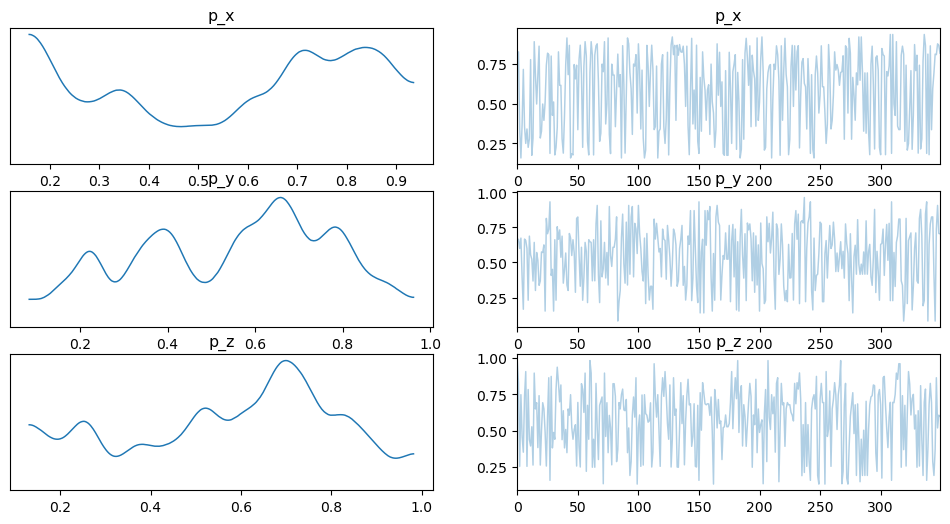

In [19]:
num_samples = 350



# Define a function to calculate the constraints

def constraint(p_x, p_y, p_z):
    return (p_x - 0.5)**2 + (p_y - 0.5)**2 + (p_z - 0.5)**2 < 0.25


with pm.Model() as model:
    # Define priors for the parameters representing the quantum state
    p_x = pm.Beta('p_x', alpha=2, beta=2)  
    p_y = pm.Beta('p_y', alpha=2, beta=2)  
    p_z = pm.Beta('p_z', alpha=2, beta=2)  
    
    # Apply constraint

    pm.Potential('constraint', pm.math.switch(constraint(p_x, p_y, p_z), 0, -np.inf))

    # Define likelihood based on the measurement outcomes
    likelihood = pm.Binomial('likelihood', n=1, p=p_x*p_y*p_z, observed=tr)
    approx = pm.fit(method='svgd', n=850)

posterior_samples = approx.sample(num_samples)
pm.plot_trace(posterior_samples)


posterior_samples
